# Project for the data analysis course in the machine learning specialization. 
---

**We'll use the classic_rock data set that was provided in one of the earlier lectures in the course.**

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import sqlite3 as sq3
import pandas as pd
import numpy as np

from scipy import stats


from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
filepath = 'classic_rock.db'

In [3]:
con = sq3.Connection(filepath)

In [4]:
query = '''SELECT * FROM sqlite_master'''

In [5]:
data = pd.read_sql(query, con)

In [6]:
data

,type,name,tbl_name,rootpage,sql
0,table,rock_songs,rock_songs,2,"CREATE TABLE ""rock_songs"" (\n""Song"" TEXT,\n ""..."
1,table,rock_plays,rock_plays,4,"CREATE TABLE ""rock_plays"" (\n""SONG RAW"" TEXT,\..."


### As we see this data set has two tables. Let's look at each of the tables:
---

# First Table

In [7]:
query_songs = '''SELECT * FROM rock_songs'''

In [8]:
data_songs = pd.read_sql(query_songs, con)

In [9]:
print (data_songs.shape)
data_songs.columns.to_list()

(1650, 4)


['Song', 'Artist', 'Release_Year', 'PlayCount']

In [10]:
data_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song          1650 non-null   object 
 1   Artist        1650 non-null   object 
 2   Release_Year  1650 non-null   float64
 3   PlayCount     1650 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 51.7+ KB




**This is the first table. It gives us the number of times particular songs were played while also giving us other information abut them, namely the Artist and the Release Year. This table has four columns:** 
1. 'Song', 
2. 'Artist', 
3. 'Release_Year' 
4. 'PlayCount' 

**There are 1650 examples or observations in this dataset. Also, there are no empty cells.**

---



# Second Table:


In [11]:
query_plays = '''SELECT * FROM rock_plays'''

In [12]:
data_plays = pd.read_sql(query_plays, con)

In [13]:
data_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37673 entries, 0 to 37672
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SONG RAW      37673 non-null  object
 1   Song Clean    37647 non-null  object
 2   ARTIST RAW    37668 non-null  object
 3   ARTIST CLEAN  37665 non-null  object
 4   CALLSIGN      37673 non-null  object
 5   TIME          37673 non-null  int64 
 6   UNIQUE_ID     37673 non-null  object
 7   COMBINED      37673 non-null  object
 8   First?        37673 non-null  int64 
 9   date_time     37673 non-null  object
 10  day_of_week   37673 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.2+ MB


**This is the second table and it gives us each of the times when a song was played. This table has 11 columns. There are 37673 observations in this data set.  Few cells are empty and we'll need to suitable take care of them.**

---
# Data Cleaning

In [14]:
data_plays = data_plays.rename(columns={'SONG RAW': 'Song Raw', 'ARTIST RAW': 'Artist Raw', 'ARTIST CLEAN': 'Artist Clean', 
                                        'CALLSIGN' : 'Call Sign', 'TIME': 'Time', 'UNIQUE_ID': 'Unique Id', 'COMBINED': 'Combined'
                                       , 'date_time': 'Date & Time', 'day_of_week': 'Day of Week'})

In [15]:
data_plays.head()

,Song Raw,Song Clean,Artist Raw,Artist Clean,Call Sign,Time,Unique Id,Combined,First?,Date & Time,Day of Week
0,Caught Up In (live),Caught Up in You,.38 Special,.38 Special,KGLK,1402943314,KGLK1536,Caught Up in You by .38 Special,1,2014-06-16 18:28:34,0
1,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403398735,KGB0260,Caught Up in You by .38 Special,0,2014-06-22 00:58:55,6
2,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403243924,KGB0703,Caught Up in You by .38 Special,0,2014-06-20 05:58:44,4
3,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403470732,KGLK0036,Caught Up in You by .38 Special,0,2014-06-22 20:58:52,6
4,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403380737,KGLK0312,Caught Up in You by .38 Special,0,2014-06-21 19:58:57,5


**Now we find all the null cells**

In [16]:
np.where(pd.isnull(data_plays))

(array([25325, 25326, 25327, 25328, 25329, 25330, 25331, 25332, 25333,
        25334, 25335, 25336, 25337, 25338, 25339, 25340, 25341, 25342,
        37665, 37665, 37665, 37666, 37666, 37667, 37667, 37668, 37668,
        37668, 37669, 37669, 37670, 37670, 37670, 37671, 37671, 37671,
        37672, 37672, 37672], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
        3, 1, 3, 1, 2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3], dtype=int64))

**As we see a bunch of null values, namely from row number 25325 to 25342, occur in the 'Song Clean' column even though 'SONG RAW' column has a valid entry. We correct this error by adding the name of these songs in the 'Song Clean' column to take care of these null cells since the rest of the data looks good and has no other missing values.**

In [17]:
data_plays.loc[25325:25342].head()

,Song Raw,Song Clean,Artist Raw,Artist Clean,Call Sign,Time,Unique Id,Combined,First?,Date & Time,Day of Week
25325,Get Off My Cloud,None,A Tribute To Rolling Stones,Rolling Stones,KGON,1402952343,KGON1424,by Rolling Stones,1,2014-06-16 20:59:03,0
25326,Jumping jack flash,None,Made famous by Rolling Stones,Rolling Stones,KCFX,1403438340,KCFX0090,by Rolling Stones,0,2014-06-22 11:59:00,6
25327,Jumping jack flash,None,Made famous by Rolling Stones,Rolling Stones,KCFX,1403297937,KCFX0467,by Rolling Stones,0,2014-06-20 20:58:57,4
25328,Jumping jack flash,None,Made famous by Rolling Stones,Rolling Stones,KCFX,1403171952,KCFX0789,by Rolling Stones,0,2014-06-19 09:59:12,3
25329,Jumping jack flash,None,Made famous by Rolling Stones,Rolling Stones,KCFX,1403060352,KCFX1072,by Rolling Stones,0,2014-06-18 02:59:12,2


**As we see, all these cells are for the band Rolling Stones. This appears to be a systematic error and we now correct it.**

In [18]:
data_plays['Song Clean'][25325:25343] = data_plays['Song Raw'][25325:25343];

C:\Users\anush\AppData\Local\Temp/ipykernel_19968/617158122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plays['Song Clean'][25325:25343] = data_plays['Song Raw'][25325:25343];


### Once again we look at the empty cells

In [19]:
np.where(pd.isnull(data_plays))

(array([37665, 37665, 37665, 37666, 37666, 37667, 37667, 37668, 37668,
        37668, 37669, 37669, 37670, 37670, 37670, 37671, 37671, 37671,
        37672, 37672, 37672], dtype=int64),
 array([1, 2, 3, 1, 3, 1, 3, 1, 2, 3, 1, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3],
       dtype=int64))

In [20]:
data_plays.loc[37665:37672].head()

,Song Raw,Song Clean,Artist Raw,Artist Clean,Call Sign,Time,Unique Id,Combined,First?,Date & Time,Day of Week
37665,Eye Of The Tiger,None,None,None,KGLK,1403258326,KGLK0695,by,1,2014-06-20 09:58:46,4
37666,Fortunate Son,None,C.F.A.,None,WLUP,1403258333,WLUP0692,by,0,2014-06-20 09:58:53,4
37667,Fortunate Son,None,C.F.A.,None,WLUP,1402984752,WLUP1379,by,0,2014-06-17 05:59:12,1
37668,In My Room,None,None,None,KGLK,1403256501,KGLK0698,by,0,2014-06-20 09:28:21,4
37669,Lucky man,None,ELP,None,KGON,1403409535,KGON0139,by,0,2014-06-22 03:58:55,6


### We find that there are a number of songs for which the 'SONG RAW' column has a valid entry but the 'Song Clean' column is missing. On top of that, for some of them, the 'ARTIST RAW' and the 'ARTIST CLEAN' column is missing. All of these appears at the very end of the dataset and this appears to be another systematic error in obtaining he data.

In [21]:
data_plays['Song Clean'][37665:37673] = data_plays['Song Raw'][37665:37673]

C:\Users\anush\AppData\Local\Temp/ipykernel_19968/718538218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plays['Song Clean'][37665:37673] = data_plays['Song Raw'][37665:37673]


In [22]:
data_plays['Artist Raw'].iloc[37665] = 'Survivor' #The name appears many times in the dataset
data_plays['Artist Raw'].iloc[37668] = 'The Beach Boys'# The name appears once in the dataset with the name 'Beach Boys in the 
#'ARTIST RAW' column and with the name 'The Beach Boys' in the 'ARTIST CLEAN' column.
data_plays['Artist Raw'].iloc[37670] = 'Simon & Garfunkel'# The name appears multiple times in the dataset
data_plays['Artist Raw'].iloc[37671] = 'Dire Straits'# This name appears once in the 'ARTIST CLEAN' column and with all caps
# in the 'ARTIST RAW' column
data_plays['Artist Raw'].iloc[37672] = "Booker T. & the M.G.'s" # The name never appears in the dataset nor does the name 
# of the song corresponding to this song: 'Time is Tight'
data_plays.drop([37672], axis = 0, inplace = True)

C:\Users\anush\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
data_plays['Artist Clean'][37665:37673] = data_plays['Artist Raw'][37665:37673]

C:\Users\anush\AppData\Local\Temp/ipykernel_19968/3935449273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plays['Artist Clean'][37665:37673] = data_plays['Artist Raw'][37665:37673]


In [24]:
data_plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37672 entries, 0 to 37671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song Raw      37672 non-null  object
 1   Song Clean    37672 non-null  object
 2   Artist Raw    37672 non-null  object
 3   Artist Clean  37672 non-null  object
 4   Call Sign     37672 non-null  object
 5   Time          37672 non-null  int64 
 6   Unique Id     37672 non-null  object
 7   Combined      37672 non-null  object
 8   First?        37672 non-null  int64 
 9   Date & Time   37672 non-null  object
 10  Day of Week   37672 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.4+ MB


### All the null cells have been taken care of appropriately. Since all the null cells corresponded to well-known songs and either had a missing entry for 'Song Clean' or the two artist columns, all of them have been appropriately filled and we didn't have to delete any row.


---
**Now let's look at the duplicate entries in the data_songs table. We'll start by looking at the duplicate songs and then compare the artist names since two different artists might have written a song with the same name.** 

In [25]:
len(data_songs['Song'].unique())

1621

**The number of unique song names in the table is only 1621 while the table 1650 rows.**

In [26]:
data_songs_duplicate = data_songs.duplicated(subset = ['Song']) #Gives a boolean list with True wherever there is a repeated 
#entry and false elsewhere.
duplicate_songs = data_songs[data_songs_duplicate == True]['Song'].to_list() #Gives a list of the 29 repeated song names.

In [27]:
#for i in range(29):
#    display(data_songs[data_songs['Song'] == duplicate_songs[i]])

**Some of the repeated song names have different artists and different release years. However, for some of them the release year is the same and the names of the artists are different due to the artist names having trivial differences. For example the song Funk#49 occurs twice with the artist names 'James Gang' and 'The James Gang'. Such songs shoulbe merged into one.**

We'll merge the following rows. The entries in bold will be absorbed into the corresponding rows.

1. **86** and 1267 - 2
2. 593 and **1430** - 
3. 79 and **541**
4. **902** and 913
5. **1005** and 1010
6. **1208**, 1209 and **1542**
7. **1060** and 1242
8. 364 and **1449**

In [28]:
merge_dict = {86:1267, 1430:593, 541:79, 902:913, 1005:1010, 1208:1209, 1542:1209, 1060:1242, 1449:364}

**This is a table of all the cells which will be dropped and whose PlayCount shall be absorbed into suitable cells.**

In [29]:
#display(data_songs.loc[merge_dict])

**This is a table of the corresponding cells into which the PlayCount of the previous table will be absorbed.**

In [30]:
#display(data_songs.loc[merge_dict.values()])

**Now we replace the Artist names in the 'ARTIST CLEAN' column**

In [31]:
#for i in merge_dict:
#    display(data_plays[(data_plays['Song Clean'] == data_songs['Song'].loc[i])&(data_plays['Artist Clean'] 
#                                                                                == data_songs['Artist'].loc[i])])

In [32]:
for i in merge_dict:
    data_plays['Artist Clean'][(data_plays['Song Clean'] == data_songs['Song'].loc[i])&
                               (data_plays['Artist Clean'] == data_songs['Artist'].loc[i])] = data_songs['Artist'][merge_dict[i]]

C:\Users\anush\AppData\Local\Temp/ipykernel_19968/758519767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_plays['Artist Clean'][(data_plays['Song Clean'] == data_songs['Song'].loc[i])&


In [33]:
#for i in merge_dict:
#    display(data_plays[(data_plays['Song Clean'] == data_songs['Song'].loc[i])&(data_plays['Artist Clean'] == data_songs['Artist'].loc[merge_dict[i]])])

**Now we go back to the first table and add the PlayCount to the rows with the chosen 'Artist' column**

In [34]:
for i in merge_dict:
    data_songs['PlayCount'][merge_dict[i]] += data_songs['PlayCount'][i] 

C:\Users\anush\AppData\Local\Temp/ipykernel_19968/4229409386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_songs['PlayCount'][merge_dict[i]] += data_songs['PlayCount'][i]


**This table corresponds to the one in which the 'PlayCount of the previous table has been added.**

In [35]:
#display(data_songs.loc[merge_dict.values()]);

**Now we need to delete the entries in bold in the previous markdown cell**

In [36]:
deleted_rows = sort([86, 1430, 541, 902, 1005, 1208, 1542, 1060, 1449])
deleted_rows= sorted(deleted_rows, reverse = True)

In [37]:
data_songs.drop(labels = deleted_rows, axis = 0, inplace = True)

**All the duplicate rows have now been deleted. We now check to see if any duplicate songs have the same artists.**

In [38]:
data_songs_duplicate = data_songs.duplicated(subset = ['Song']) #Gives a boolean list with True wherever there is a repeated 
#entry and false elsewhere.
duplicate_songs = data_songs[data_songs_duplicate == True]['Song'].to_list() #Gives a list of the 29 repeated song names.

In [39]:
#for i in range(20):
#    display(data_songs[data_songs['Song'] == duplicate_songs[i]])

**All the necessary duplicates have now been removed**

---

---
# Feature Engineering

### The columns 'Unique_Id' and 'Time' appears to be a unique character that has been provided to each play. 

In [40]:
len(data_plays['Time'])

37672

In [41]:
len(data_plays['Unique Id'].unique()) - len(data_plays)

0

**Indeed, the number of unique elements in these column is equal to the number of rows in our dataset. Thus, this column will not help us in analyzing our data at all and we remove it completely.**

In [42]:
data_plays.drop(['Unique Id', 'Time'], axis = 1, inplace = True)

In [43]:
data_plays;

**Now we turn our attention towards the 'Date & time' and 'Day of Week' columns**

In [44]:
print(min(data_plays['Date & Time'])) #Monday
print(max(data_plays['Date & Time'])) #Sunday

2014-06-16 00:28:14
2014-06-22 23:59:19


In [45]:
data_plays['Time in Hours'] = data_plays['Date & Time']

for i in range(len(data_plays['Date & Time'])):
    data_plays['Time in Hours'].iloc[i] =  int(data_plays['Time in Hours'].iloc[i][11:13]) 

In [46]:
data_plays["Time in Hours"] = data_plays["Time in Hours"].astype(str).astype(int64)

In [47]:
data_plays.head()

,Song Raw,Song Clean,Artist Raw,Artist Clean,Call Sign,Combined,First?,Date & Time,Day of Week,Time in Hours
0,Caught Up In (live),Caught Up in You,.38 Special,.38 Special,KGLK,Caught Up in You by .38 Special,1,2014-06-16 18:28:34,0,18
1,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,Caught Up in You by .38 Special,0,2014-06-22 00:58:55,6,0
2,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,Caught Up in You by .38 Special,0,2014-06-20 05:58:44,4,5
3,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,Caught Up in You by .38 Special,0,2014-06-22 20:58:52,6,20
4,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,Caught Up in You by .38 Special,0,2014-06-21 19:58:57,5,19


In [48]:
data_plays['Hour in Week'] = data_plays['Time in Hours'] + data_plays['Day of Week']*24

In [49]:
sort(data_plays['Hour in Week'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167], dtype=int64)

In [50]:
len(data_plays['Hour in Week'].unique())

159

### We should have had 24* 7 = 168 unique entries for this column, while we only have 159 entries. This means 9 entries are missing. On inspection, we find that entries from 38 to 46 are missing. 

### This explains the histogram below, wherein we see that there are no plays for these hours

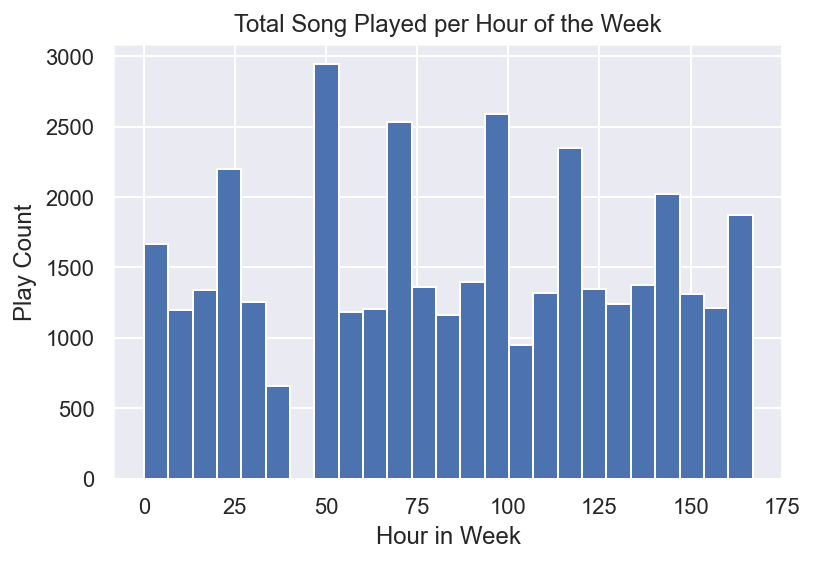

In [51]:
ax = data_plays['Hour in Week'].hist(bins = 25)
ax.set(xlabel = 'Hour in Week', ylabel = 'Play Count', title = "Total Song Played per Hour of the Week");

### The column 'CALL SIGN in the data_plays dataset has only 25 unique entries. Thus, it might be suitable for one-hot encoding.

In [52]:
one_hot_encode_cols = ['Call Sign']

In [53]:
data_plays = pd.get_dummies(data_plays, columns = one_hot_encode_cols)

**We now check if there is any systematic difference in the time of songs depending on which radio station plays them.**

In [54]:
call_signs = data_plays.columns.to_list()
call_signs = call_signs[10:]# This list now contains all the column names that correspond to the Call Signs

In [55]:
len(call_signs)

25

In [56]:
fig_list = ['fig_list' + str(i) for i in range(25)]

In [57]:
fig_list[0][0]

'f'

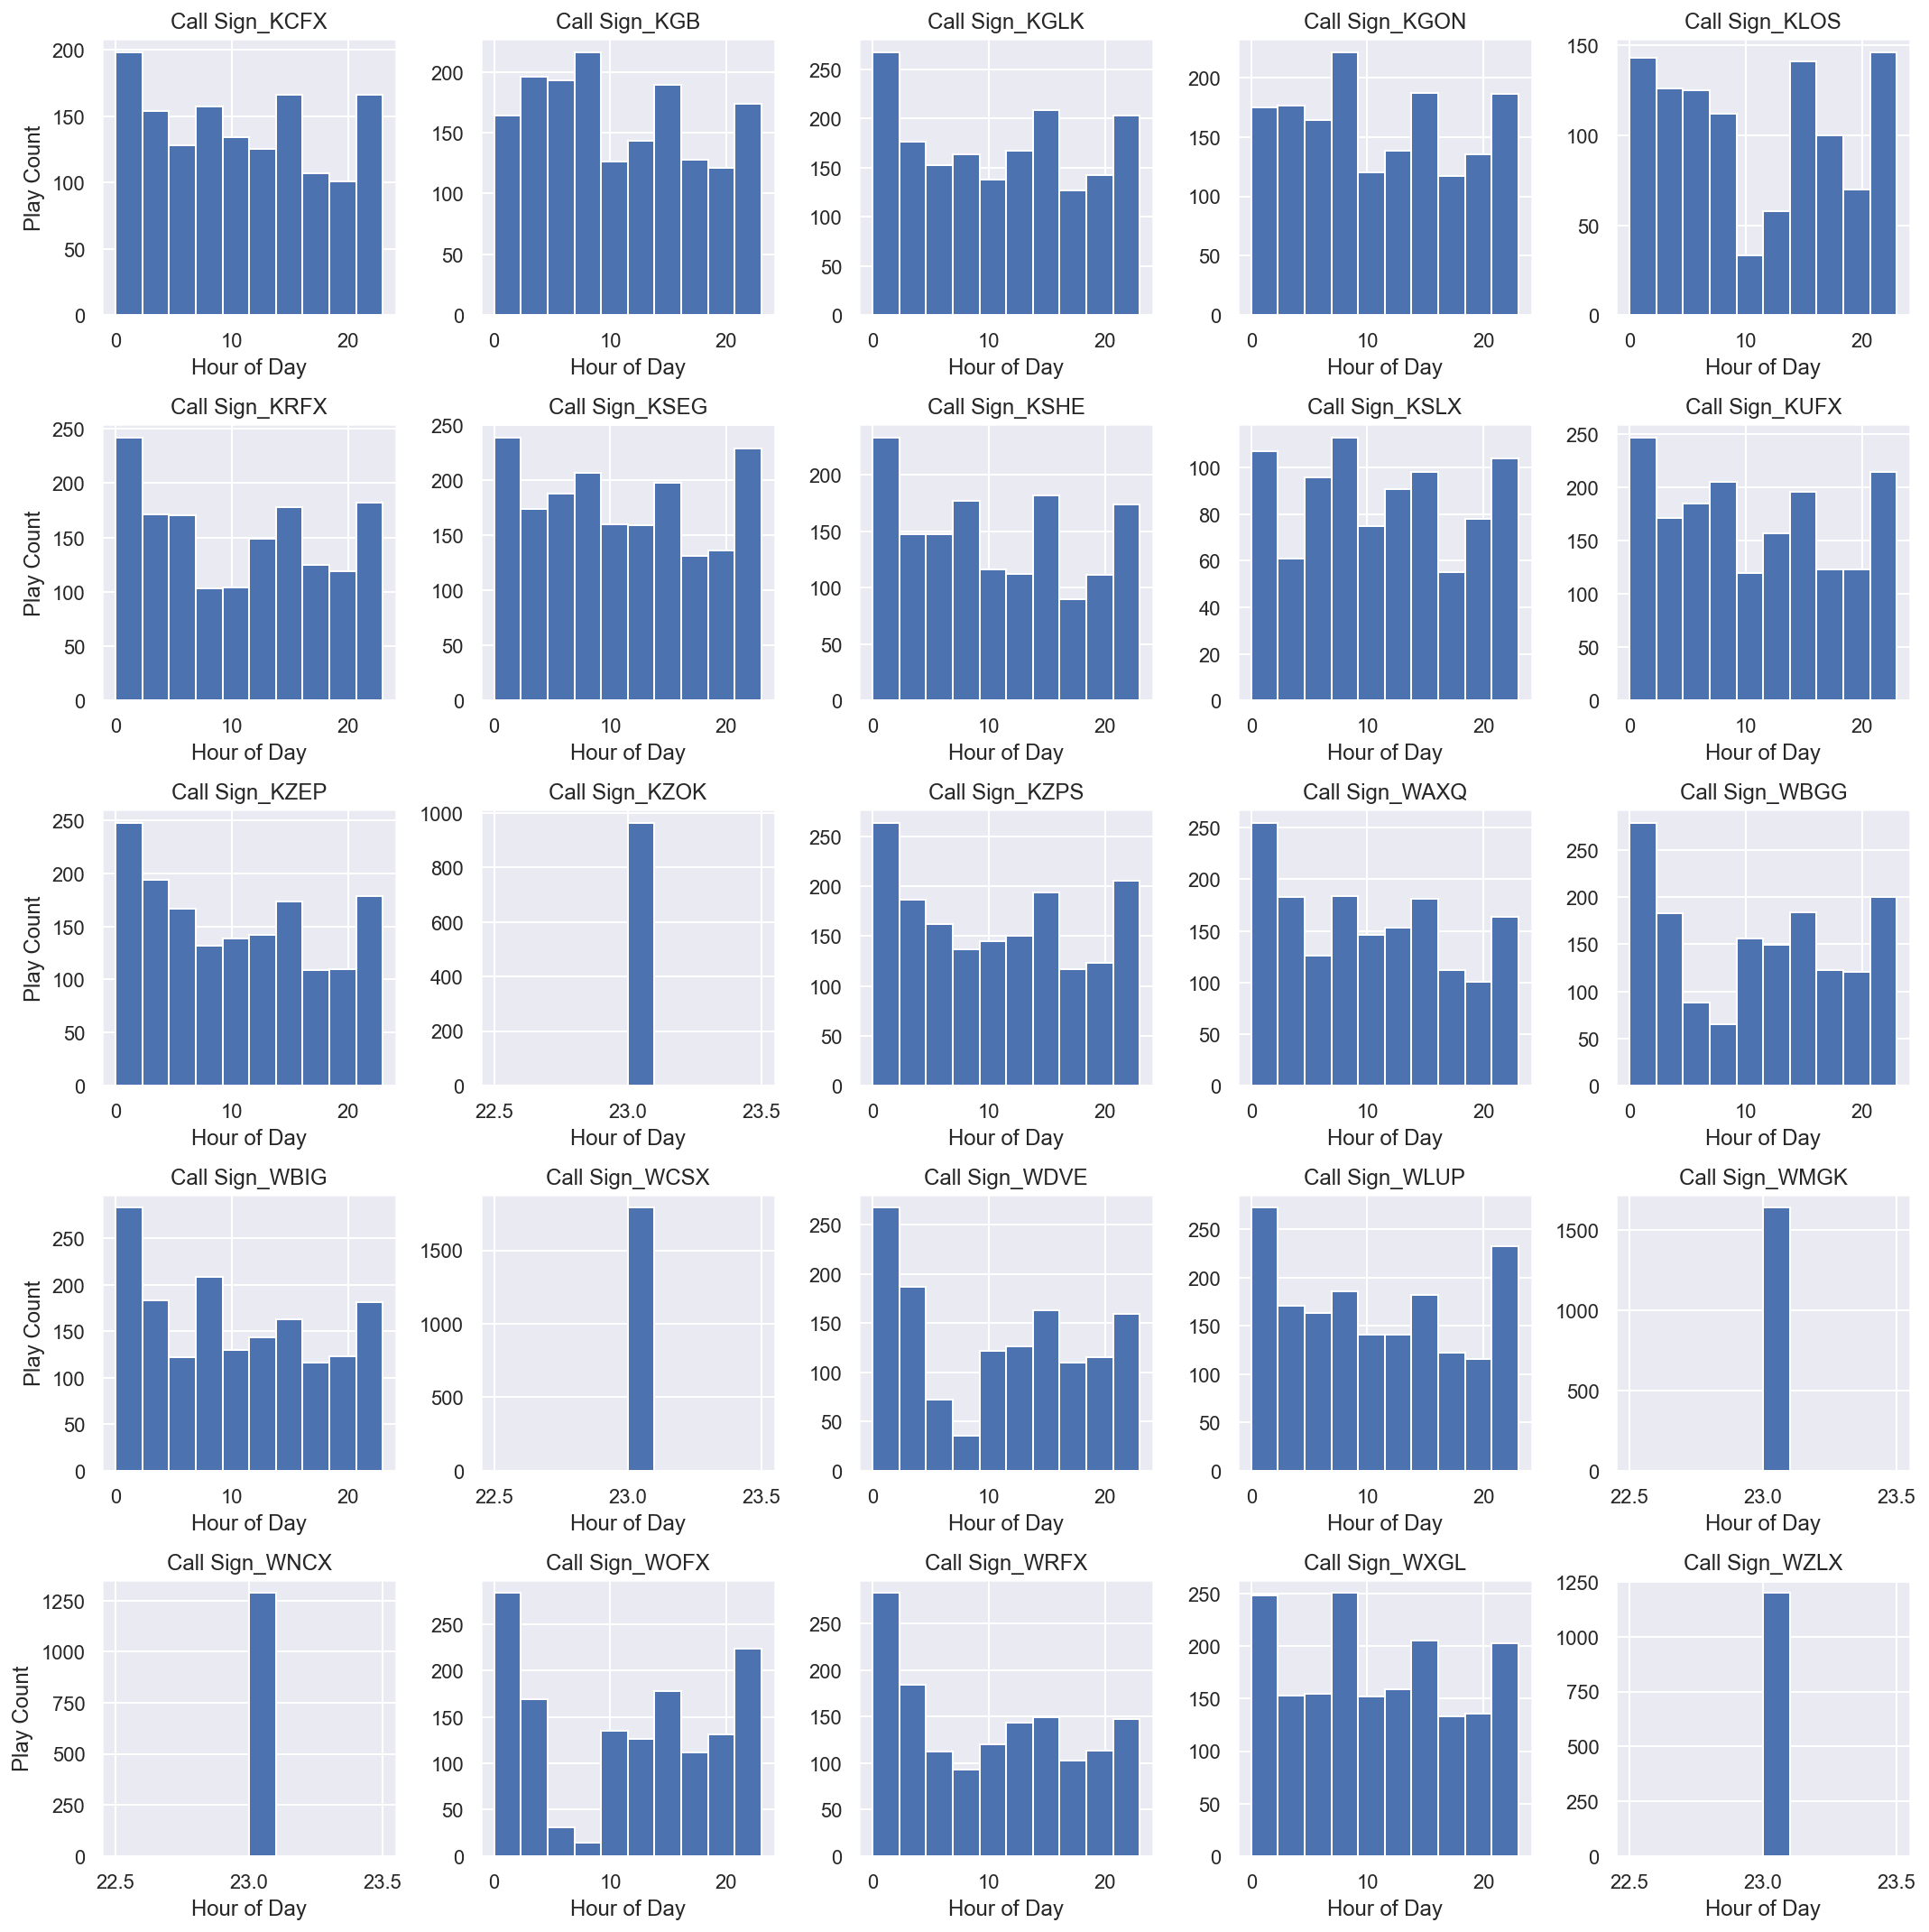

In [58]:
fig, (fig_list) = plt.subplots(5, 5, figsize=(15, 15))

for i in range(25):
    data_plays[data_plays[call_signs[i]]==1]['Time in Hours'].hist(ax=fig_list[i//5][i%5])
    fig_list[i//5][i%5].set(title = call_signs[i], xlabel = 'Hour of Day')
    fig_list[i//5][0].set(ylabel = 'Play Count')
fig.tight_layout()

**As we can see in the histograms above, all the data for 5 particular station, namely KZOK, WCSX, WMGK, WNCX and WZLX is reported at 11:00 pm and that is skewing the data.**

**We shall create a new dataset in which we remove all the songs played on these particular stations since they bias our input of the time of day. Although, we can still use the plays on these stations while considering the most played songs.**

In [59]:
data_plays_11pm_stations_removed  = data_plays[(data_plays['Call Sign_KZOK'] == 0)&(data_plays['Call Sign_WCSX'] == 0)&(data_plays['Call Sign_WMGK'] == 0)
          &(data_plays['Call Sign_WNCX'] == 0)&(data_plays['Call Sign_WZLX'] == 0)]

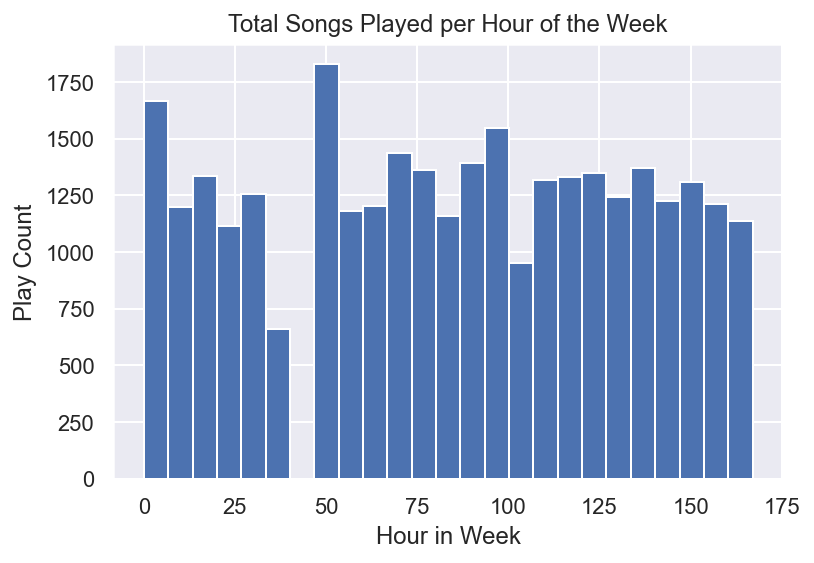

In [60]:
ax = data_plays_11pm_stations_removed['Hour in Week'].hist(bins = 25)
ax.set(xlabel = 'Hour in Week', ylabel = 'Play Count', title = "Total Songs Played per Hour of the Week");

[Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Total Plays'),
 Text(0.5, 1.0, 'Total Plays per Release Year')]

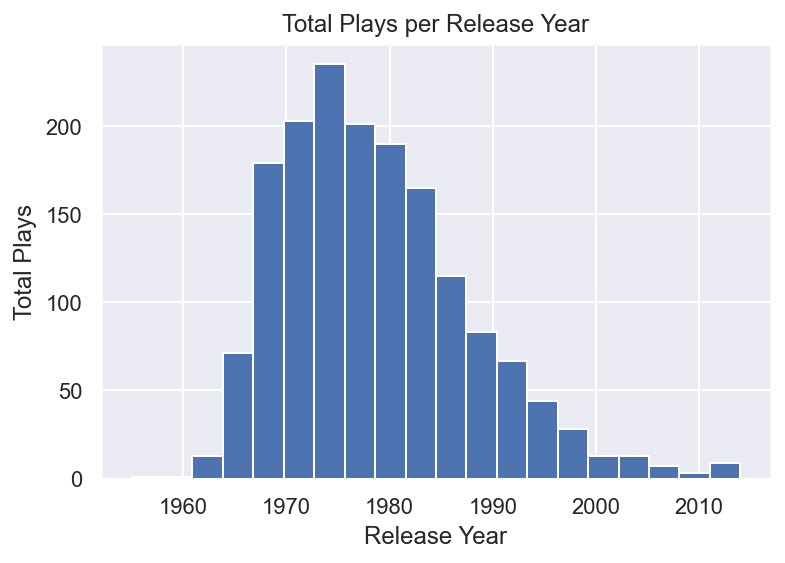

In [61]:
ax = data_songs.Release_Year.hist(bins = 20)
ax.set(xlabel = 'Release Year', ylabel = 'Total Plays', title = 'Total Plays per Release Year')

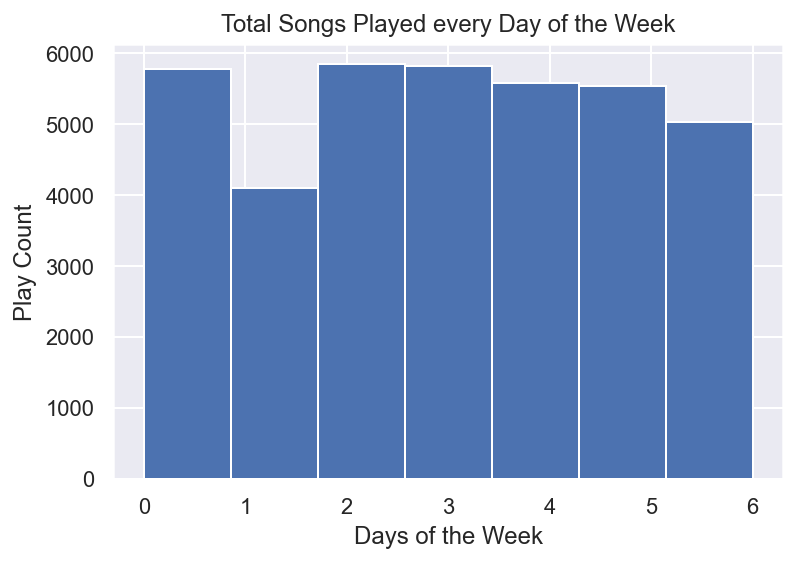

In [62]:
ax = data_plays['Day of Week'].hist(bins = 7)
ax.set(xlabel = 'Days of the Week', ylabel = 'Play Count', title = "Total Songs Played every Day of the Week");

In [63]:
data_songs[data_songs.PlayCount >= 133]

,Song,Artist,Release_Year,PlayCount
28,You Shook Me All Night Long,AC/DC,1980.0,138
37,Dream On,Aerosmith,1973.0,142
51,Sweet Emotion,Aerosmith,1975.0,141
192,More Than a Feeling,Boston,1976.0,134
617,All Along the Watchtower,Jimi Hendrix,1968.0,141
686,Carry On Wayward Son,Kansas,1976.0,134


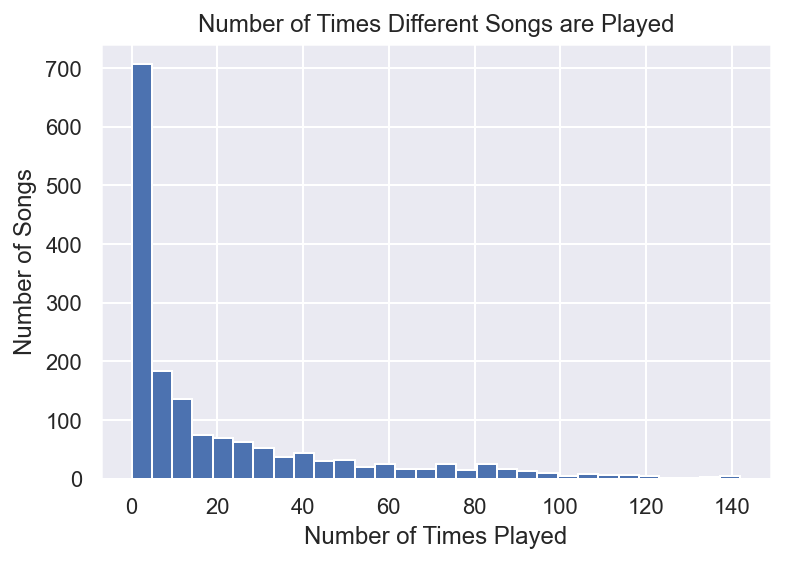

In [64]:
ax = data_songs.PlayCount.hist(bins = 30,)# Expect this to be a Pareto distribution
ax.set(xlabel = 'Number of Times Played', ylabel = 'Number of Songs', title = "Number of Times Different Songs are Played");

In [65]:
First_plays_index = data_plays[data_plays['First?'] == 1].index

In [66]:
len(First_plays_index)

2233

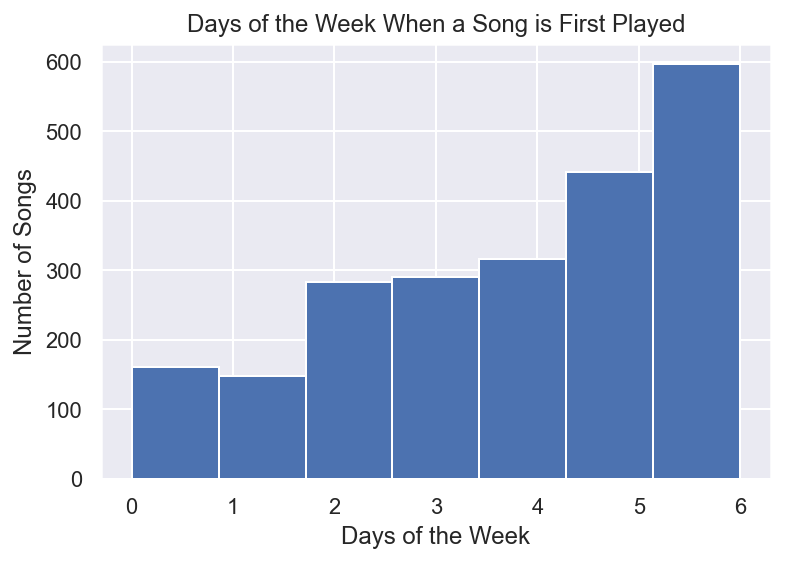

In [67]:
ax = data_plays['Day of Week'].loc[First_plays_index].hist(bins = 7)
ax.set(xlabel = 'Days of the Week', ylabel = 'Number of Songs', title = "Days of the Week When a Song is First Played");

### Almost half the songs are played for the first time over the weekend.

## Our first hypothesis is that the distribution of classic rock songs played on the radio follows a log-normal distribution as a function of the year of release of the song. 

**This makes sense because the earliest classic rock songs come from 1960, with the peak coming around the mid 1970s and there being a slow but rather consistent decrease since that time. For a normal distribution, there would be a probability, however small, of finding a song as far back in history as we want to. This is because the normal distribution has a tail which never goes exactly to zero regardless of how close to zero it might approach. This problem is naturally overcome through a log-normal distribution.**

Text(0.5, 0.98, 'Total Plays by Release Years')

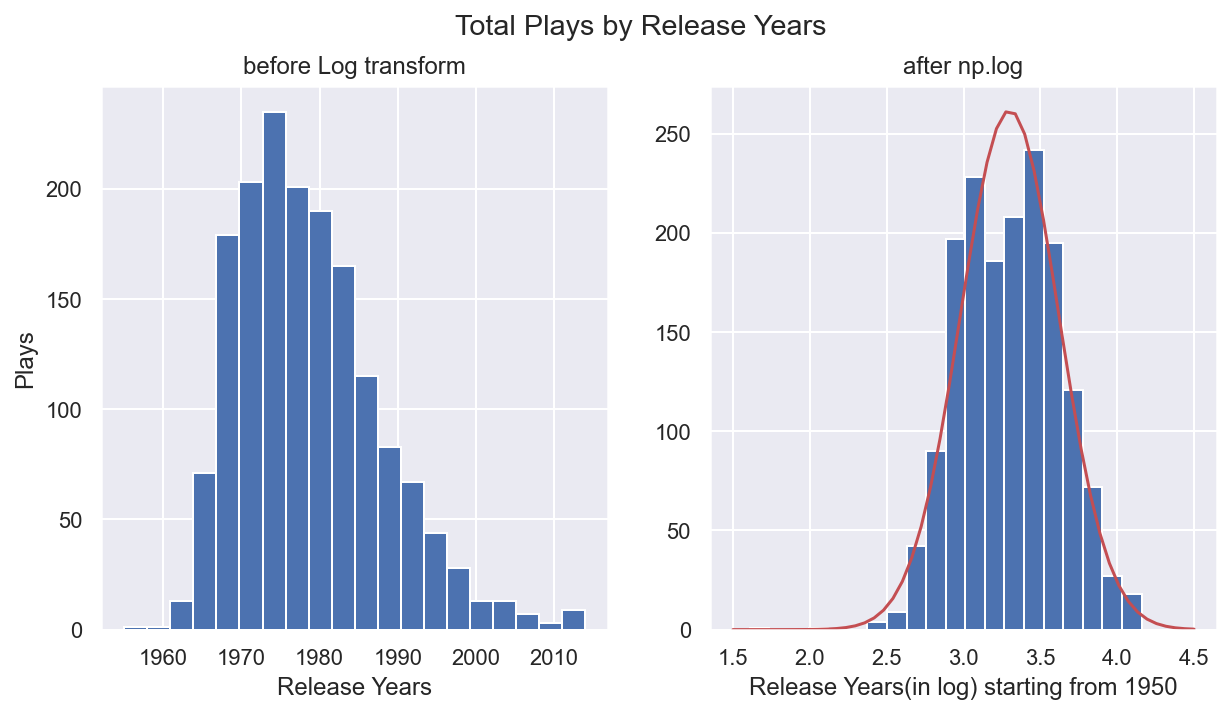

In [68]:
fig , (ax_before, ax_after) = plt.subplots(1,2,figsize = (10,5));

field = 'Release_Year'
field_new = 'Release_Year_Normalized'
data_songs[field_new] = data_songs[field] - 1950
data_songs[field].hist(ax = ax_before, bins =20);
x = np.linspace(1.5, 4.5, 50)
plt.plot(x,210*stats.norm.pdf(x, 3.3, 0.32),'r')

data_songs[field_new].apply(np.log).hist(ax = ax_after, bins = 20);



ax_before.set(title = 'before Log transform', ylabel = 'Plays', xlabel = 'Release Years')

ax_after.set(title = 'after np.log', xlabel = 'Release Years(in log) starting from 1950')

fig.suptitle('Total Plays by Release Years')

In [69]:
from scipy.stats.mstats import normaltest

In [70]:
normaltest(data_songs[field_new].apply(np.log))

NormaltestResult(statistic=1.0059617102145852, pvalue=0.6047253716856571)

The p-value for this test is greater than some threshold of say 0.05 that we would want to impose. That means the null hypothesis is not rejected. The null hypothesis for the normaltest is that the distribution is a normal distribution. Thus, the normal test tells us that we cannot reject the hypothesis that the distribution is a normal distribution.

In [70]:
data_songs[field_new].apply(np.log).describe()

count    1641.000000
mean        3.301649
std         0.321675
min         1.609438
25%         3.044522
50%         3.295837
75%         3.526361
max         4.158883
Name: Release_Year_Normalized, dtype: float64

## Hyposthesis 2 - The number of songs played on different days of the week follow a uniform distribution. 

We start by finding the mean of total songs played every day of the week leaving out Tuesday

In [71]:
sum = 0
for i in range(7):
    if i !=1:
        sum += len(data_plays[data_plays['Day of Week']==i])
average = sum/6
print (sum/6)

5595.666666666667


In [72]:
var = 0
for i in range(7):
    if i !=1:
        var += (len(data_plays[data_plays['Day of Week']==i]) - average)**2
print(var**0.5/5)

136.13101532469864


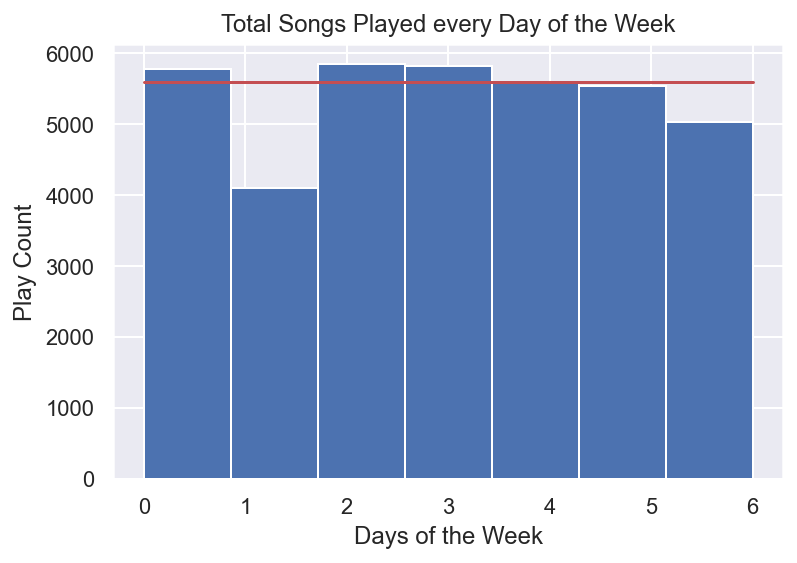

In [73]:
x = np.linspace(0, 6.0, 50)
plt.plot(x,5595.6*6*stats.uniform.pdf(x, 0, 6),'r')

ax = data_plays['Day of Week'].hist(bins = 7)
ax.set(xlabel = 'Days of the Week', ylabel = 'Play Count', title = "Total Songs Played every Day of the Week");

In [153]:
data_songs[data_songs['PlayCount'] ==1]

,Song,Artist,Release_Year,PlayCount,Release_Year_Normalized
3,Art For Arts Sake,10cc,1975.0,1,25.0
5,Loser,3 Doors Down,2000.0,1,50.0
8,Take On Me,a-ha,1985.0,1,35.0
13,Hard As A Rock,AC/DC,1995.0,1,45.0
18,Jailbreak,AC/DC,1984.0,1,34.0
...,...,...,...,...,...
1624,Persephone,Wishbone Ash,1980.0,1,30.0
1632,Starship Trooper,Yes,1971.0,1,21.0
1633,Yours Is No Disgrace,Yes,1971.0,1,21.0
1635,Arrested For Driving While Blind,ZZ Top,1976.0,1,26.0


## Our third hypothesis is that the distribution of the number of times a song is played will follow a Pareto distribution. This is because the most famous songs will be played more often and will have a much greater probabilty of being played. This is the so-called 80-20 rule.


In [87]:
data_songs.describe()

,Release_Year,PlayCount,Release_Year_Normalized
count,1641.000000,1641.000000,1641.000000
mean,1978.589884,20.443632,28.589884
std,9.325385,27.580912,9.325385
min,1955.000000,0.000000,5.000000
25%,1971.000000,2.000000,21.000000
50%,1977.000000,7.000000,27.000000
75%,1984.000000,29.000000,34.000000
max,2014.000000,142.000000,64.000000


In [307]:
X = [] #No.of times played
Y = [] #No. of songs
for i in range(1, 143, 1):
    if len(data_songs[data_songs['PlayCount'] == i] )!=0:
        Y.append(len(data_songs[data_songs['PlayCount'] == i] ) )
        X.append(i)

In [308]:
X = np.array(X)
Y = np.array(Y)

In [309]:
X = 338/X**2.16

In [306]:
Y = np.log(Y)

In [301]:
X

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

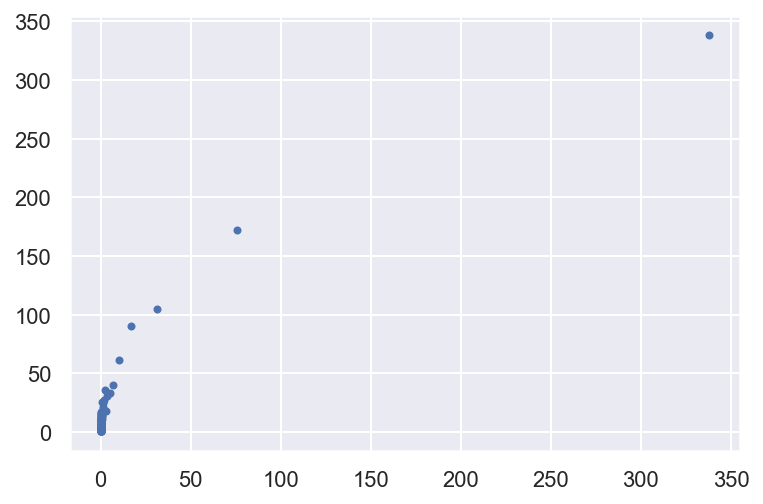

In [310]:
plt.plot(X,Y, '.')

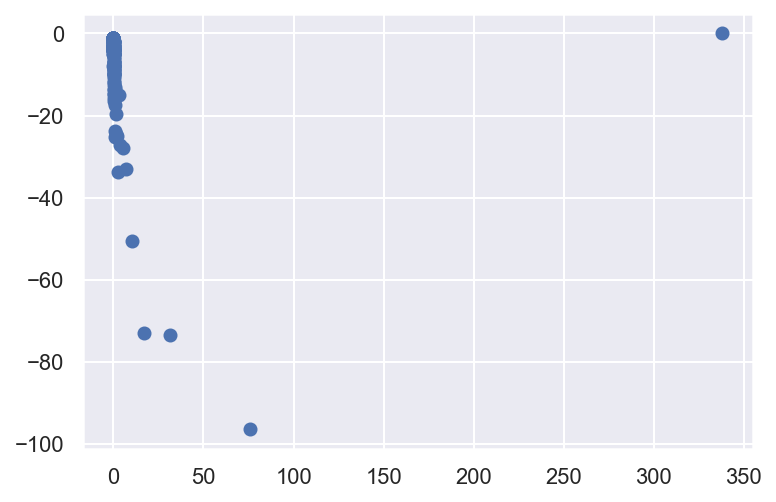

In [311]:
plt.plot(X, X-Y, 'o')



In [312]:
#X2 = sm.add_constant(X)
est = sm.OLS(Y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              523.3
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                    3.42e-45
Time:                        12:25:08   Log-Likelihood:                         -503.90
No. Observations:                 119   AIC:                                      1010.
Df Residuals:                     118   BIC:                                      1013.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [317]:
est2.params

array([1.10081981])

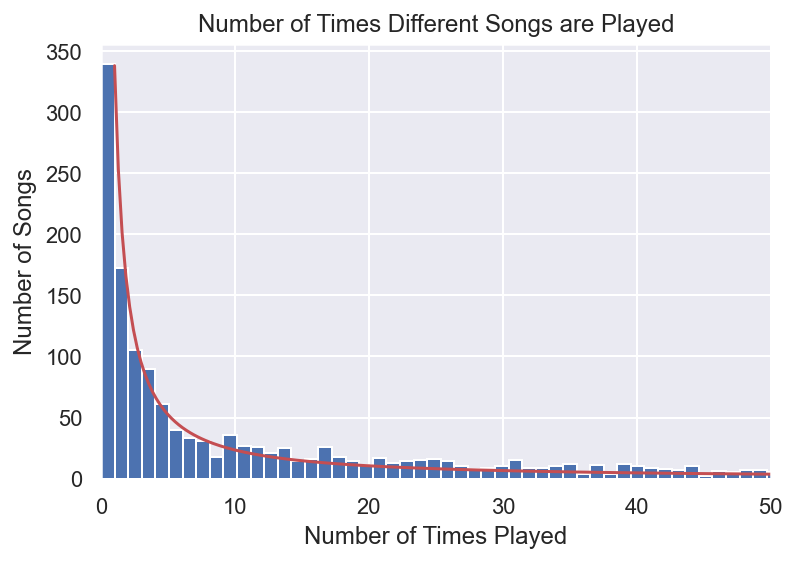

In [320]:
ax = data_songs.PlayCount.hist(bins = 140,)# Expect this to be a Pareto distribution
x = np.linspace(1, 142, 500)
plt.plot(x,338/(x**1.16),'r')
ax.set(xlabel = 'Number of Times Played', ylabel = 'Number of Songs', title = "Number of Times Different Songs are Played", xlim = (0, 50));

### This histogram of the number of songs played on the days of the week.

In [149]:
data_plays['Date & Time'].iloc[1][:]

'2014-06-22 00:58:55'

In [150]:
data_plays['Day of Week'].iloc[0]

0

### It appears that every day of the week more music is played between 11:00 pm and midnight than any other hour during the day. 

<AxesSubplot:>

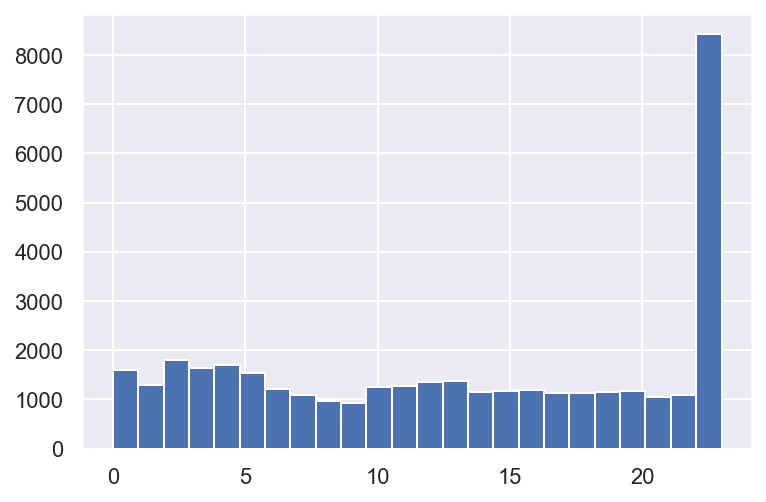

In [58]:
data_plays.time_in_hours.iloc[:].hist(bins = 24)

In [59]:
len(data_songs.loc[data_songs['PlayCount'] > 100,:])

35

In [824]:
sum(data_plays['First?'])

2233

In [825]:
len(data_plays['Song Raw'].unique())

3710

In [185]:
data_plays.head()

,Song Raw,Song Clean,Artist Raw,Artist Clean,Call Sign,Time,Unique Id,Combined,First?,Date & Time,Day of Week,time_in_hours,hour_in_week
0,Caught Up In (live),Caught Up in You,.38 Special,.38 Special,KGLK,1402943314,KGLK1536,Caught Up in You by .38 Special,1,2014-06-16 18:28:34,0,18,18
1,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403398735,KGB0260,Caught Up in You by .38 Special,0,2014-06-22 00:58:55,6,0,144
2,Caught Up In You,Caught Up in You,.38 Special,.38 Special,KGB,1403243924,KGB0703,Caught Up in You by .38 Special,0,2014-06-20 05:58:44,4,5,101
3,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403470732,KGLK0036,Caught Up in You by .38 Special,0,2014-06-22 20:58:52,6,20,164
4,Caught Up in You,Caught Up in You,.38 Special,.38 Special,KGLK,1403380737,KGLK0312,Caught Up in You by .38 Special,0,2014-06-21 19:58:57,5,19,139


In [827]:
data_first_played = data_plays.where(data_plays['First?']==1).dropna(how='all').dropna(axis=1)

In [828]:
data_first_played

,Song Raw,Song Clean,Artist Raw,Artist Clean,Time,Combined,First?,Date & Time,Day of Week,time_in_hours,...,Call Sign_WBIG,Call Sign_WCSX,Call Sign_WDVE,Call Sign_WLUP,Call Sign_WMGK,Call Sign_WNCX,Call Sign_WOFX,Call Sign_WRFX,Call Sign_WXGL,Call Sign_WZLX
0,Caught Up In (live),Caught Up in You,.38 Special,.38 Special,1.402943e+09,Caught Up in You by .38 Special,1.0,2014-06-16 18:28:34,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,Fantasy Girl,Fantasy Girl,.38 Special,.38 Special,1.403172e+09,Fantasy Girl by .38 Special,1.0,2014-06-19 09:58:49,3.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85,Hold On Loosely,Hold On Loosely,.38 Special,.38 Special,1.403474e+09,Hold On Loosely by .38 Special,1.0,2014-06-22 21:58:46,6.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,Rockin' Into The Night,Rockin' Into the Night,.38 Special,.38 Special,1.403226e+09,Rockin' Into the Night by .38 Special,1.0,2014-06-20 00:59:57,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,Art For Arts Sake,Art For Arts Sake,10cc,10cc,1.403435e+09,Art For Arts Sake by 10cc,1.0,2014-06-22 10:59:24,6.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37521,Tube Snake Boogie,Tube Snake Boogie,ZZ Top,ZZ Top,1.403395e+09,Tube Snake Boogie by ZZ Top,1.0,2014-06-21 23:59:22,5.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37553,Tush,Tush,ZZ Top,ZZ Top,1.403330e+09,Tush by ZZ Top,1.0,2014-06-21 05:59:15,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37662,TV Dinners,TV Dinners,ZZ Top,ZZ Top,1.402963e+09,TV Dinners by ZZ Top,1.0,2014-06-16 23:54:35,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37663,WAITIN' FOR THE BUS/JESUS JUST LEFT CHICAGO,WAITIN' FOR THE BUS/JESUS JUST LEFT CHICAGO,ZZ Top,ZZ Top,1.403226e+09,WAITIN' FOR THE BUS/JESUS JUST LEFT CHICAGO by...,1.0,2014-06-20 00:59:24,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [832]:
smaller_data_plays= data_plays.loc[:,['Day of Week', 'time_in_hours']]
smaller_data_plays_11pm_stations_removed = data_plays_11pm_stations_removed.loc[:,['Day of Week', 'time_in_hours']]

In [833]:
smaller_data_plays.describe()
smaller_data_plays_11pm_stations_removed.describe()

,Day of Week,time_in_hours
count,30793.000000,30793.000000
mean,3.069074,10.872926
std,1.981993,7.123073
min,0.000000,0.000000
25%,2.000000,4.000000
50%,3.000000,11.000000
75%,5.000000,17.000000
max,6.000000,23.000000


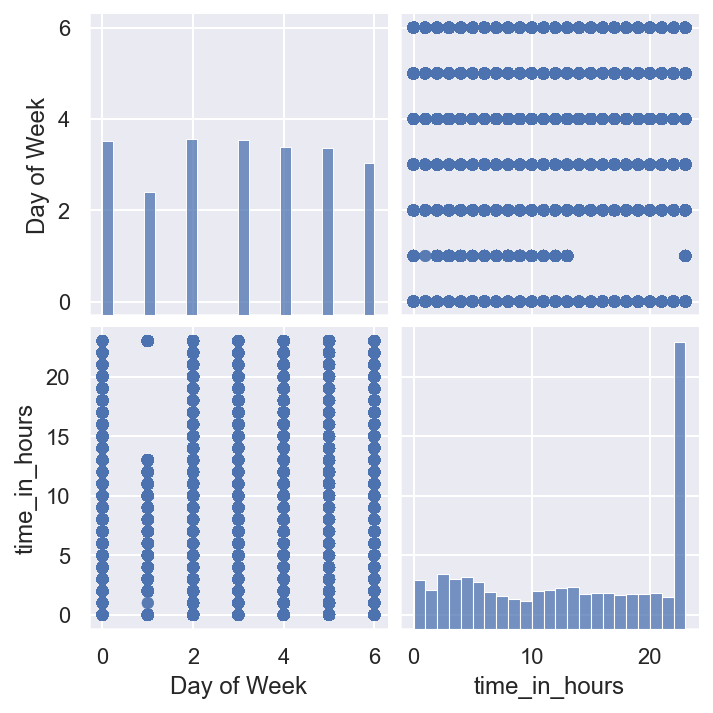

In [834]:
sns.pairplot(smaller_data_plays, plot_kws = dict(alpha = 0.2, edgecolor = 'None'))

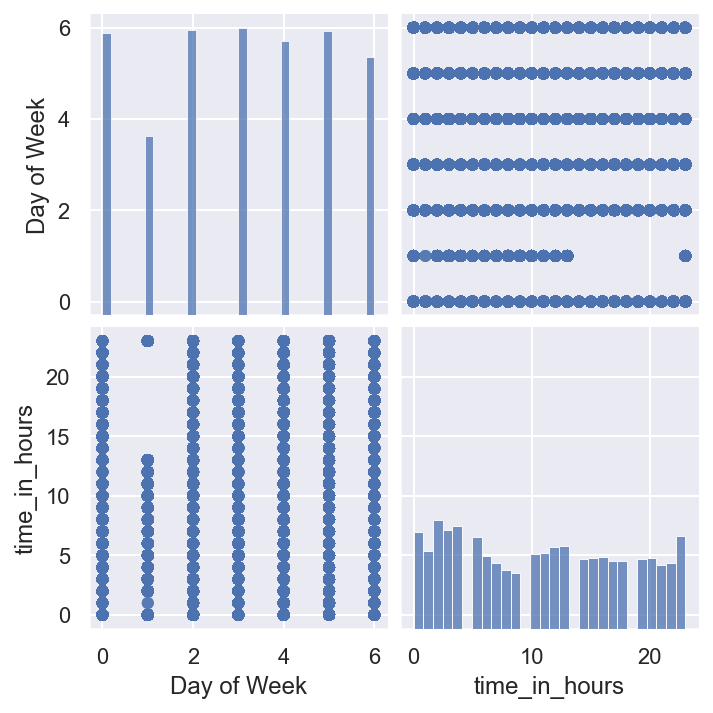

In [835]:
sns.pairplot(smaller_data_plays_11pm_stations_removed, plot_kws = dict(alpha = 0.2, edgecolor = 'None'))

In [839]:
sort(data_plays['time_in_hours'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [840]:
smaller_data_songs = data_songs.loc[:,['Release_Year', 'PlayCount']]

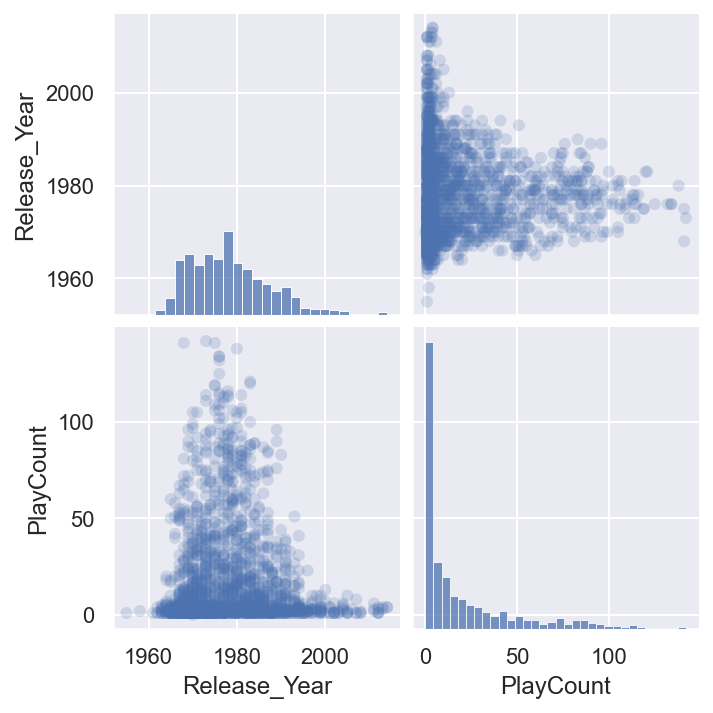

In [841]:
sns.pairplot(smaller_data_songs, plot_kws = dict(alpha = 0.2, edgecolor = 'None'))

In [842]:
top_songs_index = data_songs[data_songs['PlayCount'] >=50].index

In [843]:
data_top_songs = data_songs.loc[top_songs_index]

In [844]:
smaller_data_top_songs = data_top_songs.loc[:,['Release_Year', 'PlayCount']]

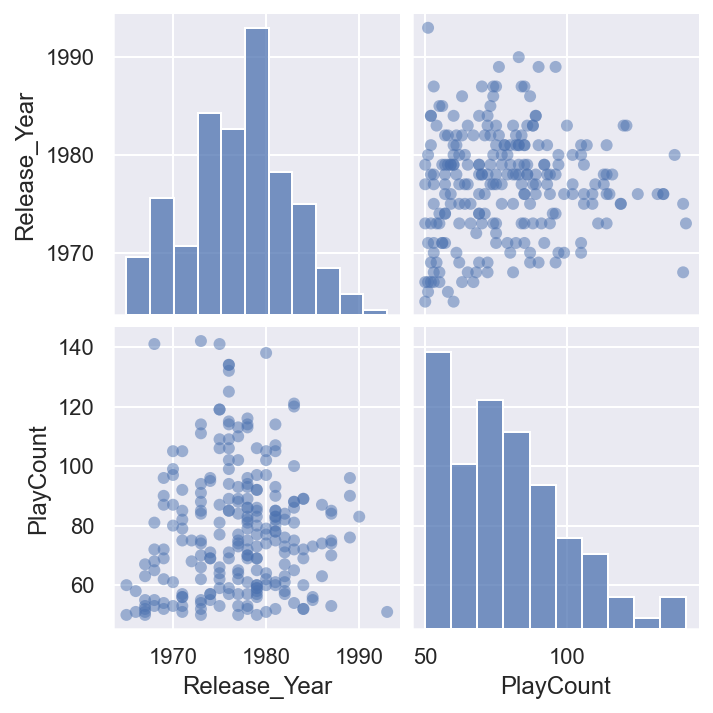

In [845]:
sns.pairplot(smaller_data_top_songs, plot_kws = dict(alpha = 0.5, edgecolor = 'None'))

In [846]:
smaller_data_top_songs

,Release_Year,PlayCount
0,1982.0,82
1,1981.0,85
9,1980.0,97
11,1976.0,85
15,1980.0,74
...,...,...
1638,1983.0,86
1642,1973.0,111
1643,1983.0,121
1645,1983.0,120


In [308]:
query_artists = '''
SELECT Artist, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays, COUNT(*)*AVG(PlayCount) AS Total_Plays, Release_Year
    FROM rock_songs
    GROUP BY Artist
    ORDER BY Total_Plays desc;
'''

In [309]:
data_artists  = pd.read_sql(query_artists, con)

In [310]:
data_artists[data_artists['num_songs'] == 96]

,Artist,num_songs,avg_plays,Total_Plays,Release_Year
7,The Beatles,96,7.291667,700.0,1967.0


In [311]:
top_artists_index = data_artists[data_artists['num_songs'] >=5].index

In [312]:
data_top_artists = data_artists.loc[top_artists_index]

In [313]:
data_top_artists

,Artist,num_songs,avg_plays,Total_Plays,Release_Year
0,Led Zeppelin,68,22.735294,1546.0,1970.0
1,Rolling Stones,47,23.659574,1112.0,1965.0
2,Van Halen,27,39.074074,1055.0,1982.0
3,Pink Floyd,39,26.769231,1044.0,1979.0
4,Tom Petty & The Heartbreakers,18,50.888889,916.0,1981.0
...,...,...,...,...,...
170,Alice In Chains,6,3.666667,22.0,1992.0
181,Chicago,5,4.000000,20.0,1970.0
187,Ringo Starr,6,2.833333,17.0,1972.0
193,Cinderella,5,3.000000,15.0,1988.0


In [316]:
smaller_data_artists = data_top_artists.loc[:,['num_songs', 'avg_plays', 'Release_Year']]

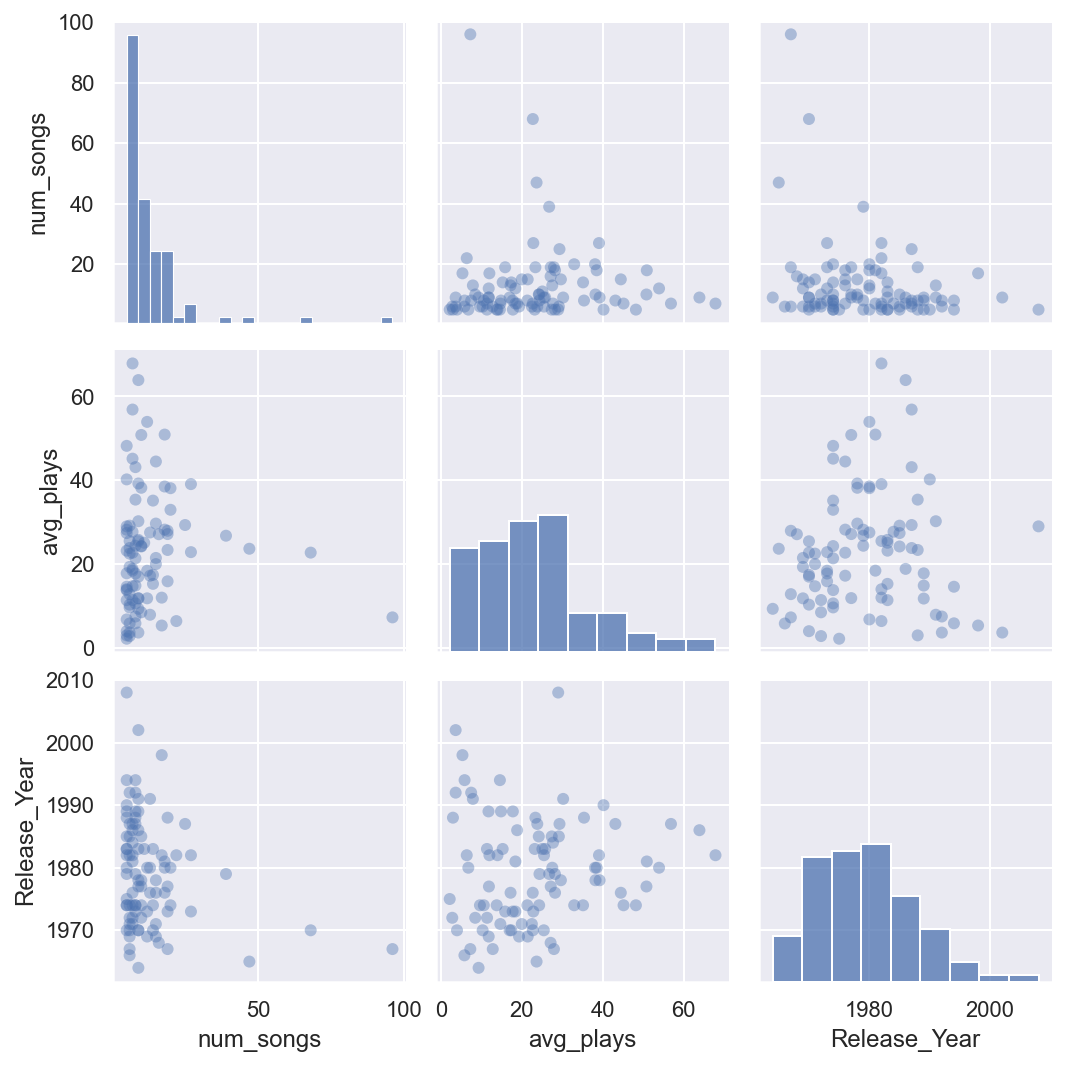

In [317]:
sns.pairplot(smaller_data_artists, plot_kws = dict(alpha = 0.4, edgecolor = 'None'))